In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# episenter sintetik
x0 = 40
y0 = 30

# origin time dan vp sintetik
vp = 4 # km/s
t0 = 0

# data koordinat stasiun
xs = np.array([20,60,40,10,10,55])
ys = np.array([10,25,60,40,25,50])
label = ['ST-01','ST-02','ST-03','ST-04','ST-05', 'ST-06']

## $t^{cal}_i = t_0 + \frac{\sqrt{(xs_i - x_0)^2 + (ys_i - y_0)^2}}{v_p} ; i = 1,...,N $

In [3]:
# persamaan menghitung travel time
def f(xsi,ysi, x0=40,y0=30, vp=4):
    return t0 + np.sqrt((x0-xsi)**2 + (y0-ysi)**2)/(vp)

In [4]:
# t observasi sintetik
t_obs = f(xs,ys)
t_obs

array([7.07106781, 5.15388203, 7.5       , 7.90569415, 7.60345316,
       6.25      ])

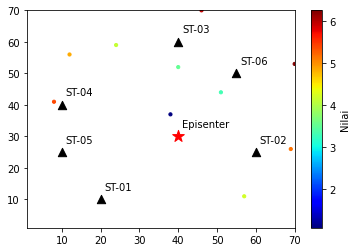

In [13]:
# membuat grid random
jumlah_data = 10
grid = np.random.randint(0, 71, size=(jumlah_data, 2))

# menghitung misfit
misfit = np.zeros(len(grid))
for i in range(len(grid)):
    misfit[i] = np.sqrt(np.mean((t_obs-f(xs, ys, grid[i,0], grid[i,1]))**2))
    

df = pd.DataFrame({'X': grid[:, 0], 'Y': grid[:, 1], 'Misfit': misfit})


# plot
plt.scatter(grid[:,0], grid[:,1], c=misfit, cmap='jet',s=10)
plt.colorbar(label='Nilai')

for i in range(len(xs)):
    plt.scatter(xs[i], ys[i], color='k', marker='^', s=70)
    plt.text(xs[i]+1, ys[i]+3, f"{label[i]}")

plt.scatter(x0, y0, color='red', marker='*', s=150)

plt.text(x0+1, y0+3, "Episenter")
plt.xlim(1,70)
plt.ylim(1,70)
plt.show()

In [14]:
df[df.Misfit == df.Misfit.min()]

,X,Y,Misfit
3,38,37,1.069671


In [7]:
grid = np.random.randint(0, 71, size=(1, 2))
grid

array([[31, 65]])